In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')


\begin{alignat}{5}
         & \arg\!\min_{\mathcal{D}, \mathcal{R}} \|X \ -&\mathcal{D}\mathcal{R}\|_F^2  + &\lambda \sum_{i=1}^k  \|\ r_i\|_0     \quad   \\
         &\text{s.t.}  \quad  &\|d_j\|_2 \leq 1&, \forall j=1, ...,n  \quad 
\end{alignat}

$$\|X \ -\mathcal{D}\mathcal{R}\|_F^2 = \|X - D_S D_S^+ X\|_F^2$$

In [62]:
# random matrix (can be later an image for denoising!)
d = 10
K = 10
n = 10

X = np.random.random(size=(d, K))
D = np.random.random(size=(d, n))

# R will be n x K

# normalize D s.t. that columns of D have l2 norm = 1
for j in range(n):
    D[:, j] /= np.sum(D[:, j])

In [63]:
np.sum(X, axis=0)

array([ 3.84205195,  4.42385221,  4.5076539 ,  3.463943  ,  4.35237814,
        5.50814476,  4.44822841,  6.26108073,  5.19541453,  4.78713151])

In [64]:
X.shape

(10, 10)

In [65]:
# greedy algorithm
num_steps = 6
S = np.zeros(num_steps, dtype=int)
val_trace = []
for step in range(num_steps):
    
    cur_sel_columns = list(S[:step])
    # find argmin
    norms = np.zeros(D.shape[1]) + 9999.9
    for i in range(D.shape[1]):
        if i in cur_sel_columns:
            continue
        DS = D[:, cur_sel_columns+[i]]
        
        norms[i] = np.linalg.norm(X - np.dot(DS, np.dot(np.linalg.pinv(DS), X)), 'fro')
    S[step] = np.argmin(norms)
    
    # add current norm value for the current dict
    cur_sel_columns = list(S[:step+1])
    DS = D[:, cur_sel_columns]
    obj_val = np.linalg.norm(X - np.dot(DS, np.dot(np.linalg.pinv(DS), X)), 'fro')
    val_trace.append(obj_val)
    print(cur_sel_columns)

[8]
[8, 7]
[8, 7, 6]
[8, 7, 6, 2]
[8, 7, 6, 2, 3]
[8, 7, 6, 2, 3, 1]


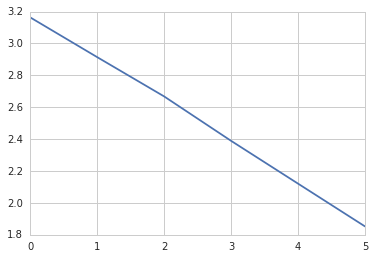

In [66]:
%matplotlib inline
plt.plot(val_trace)

In [67]:
from sklearn.linear_model import MultiTaskLasso

In [72]:
lasso_val_trace = []
for i in range(num_steps):
    lasso_R = MultiTaskLasso(alpha=.0001, max_iter=i).fit(D, X).coef_
    obj_val = np.linalg.norm(X - np.dot(D, lasso_R), 'fro')
    lasso_val_trace.append(obj_val)

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1687: UserWarning: Objective did not converge, you might want to increase the number of iterations
  warnings.warn('Objective did not converge, you might want'


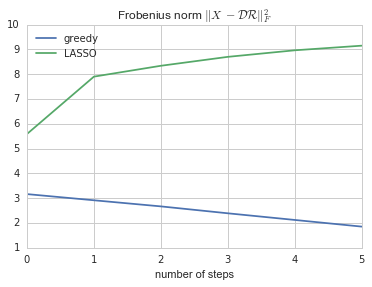

In [73]:
%matplotlib inline
plt.plot(val_trace, label='greedy')
plt.plot(lasso_val_trace, label='LASSO')
plt.title('Frobenius norm $\|X \ -\mathcal{D}\mathcal{R}\|_F^2$')
plt.xlabel('number of steps')
plt.legend(loc='best')